In [1]:
import torch
import datasets

from torch.utils.data import Dataset, SubsetRandomSampler

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

device = torch.device("cuda:0")

In [2]:
def train_model(model, train_loader, val_loader, loss, optimizer, num_epochs, lr_scheduler=None):    
    loss_history = []
    train_history = []
    val_history = []
    for epoch in range(num_epochs):
        model.train()
        
        loss_accum = 0
        correct_samples = 0
        total_samples = 0
        for i_step, (x, y) in enumerate(train_loader):
            x_gpu = x.to(device)
            y_gpu = y.to(device)
            prediction = model(x_gpu)    
            loss_value = loss(prediction, y_gpu)
            optimizer.zero_grad()
            loss_value.backward()
            optimizer.step()
            loss_accum += loss_value.item()
            

        ave_loss = loss_accum / i_step
        val_loss = compute_loss(model, val_loader)
        
        loss_history.append(float(ave_loss))
        val_history.append(float(val_loss))
        
        if lr_scheduler:
            lr_scheduler.step()
        
        print("Average loss: %f, Val loss: %f" % (ave_loss, val_loss))
        
    return loss_history, val_history
        
def compute_loss(model, loader):
    """
    Computes accuracy on the dataset wrapped in a loader
    
    Returns: accuracy as a float value between 0 and 1
    """
    model.eval() # Evaluation mode
    # TODO: Copy implementation from previous assignment
    # Don't forget to move the data to device before running it through the model!
    loss_accum = 0
    for i_step, (x, y) in enumerate(loader):
        x_gpu = x.to(device)
        y_gpu = y.to(device)
        prediction = model(x_gpu)
        loss_value = loss(prediction, y_gpu)
        loss_accum += loss_value.item()

    ave_loss = loss_accum / i_step
    return ave_loss

# Подход без закладывания скоростей

In [3]:
train_folder = 'D:/CernDataset'

In [4]:
dataset = datasets.CernDataset(train_folder, load_from_npy=True, start_moment=0, end_moment=8)

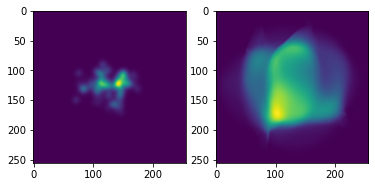

In [5]:
x, y = dataset[9]

fig = plt.figure(figsize=(6,3))

fig.add_subplot(1, 2, 1)
plt.imshow(torch.squeeze(x))
fig.add_subplot(1, 2, 2)
plt.imshow(torch.squeeze(y))

In [6]:
batch_size = 2

data_size = len(dataset)
validation_fraction = .2

val_split = int(np.floor((validation_fraction) * data_size))
indices = list(range(data_size))
np.random.seed(42)
np.random.shuffle(indices)

val_indices, train_indices = indices[:val_split], indices[val_split:]

train_sampler = SubsetRandomSampler(train_indices)
val_sampler = SubsetRandomSampler(val_indices)

train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                           sampler=train_sampler)
val_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                         sampler=val_sampler)

In [4]:
def train_model(model, train_loader, val_loader, loss, optimizer, num_epochs, lr_scheduler=None):    
    loss_history = []
    train_history = []
    val_history = []
    for epoch in range(num_epochs):
        model.train()
        
        loss_accum = 0
        correct_samples = 0
        total_samples = 0
        for i_step, (x, y) in enumerate(train_loader):
            x_gpu = x.to(device)
            y_gpu = y.to(device)
            prediction = model(x_gpu)    
            loss_value = loss(prediction, y_gpu)
            optimizer.zero_grad()
            loss_value.backward()
            optimizer.step()
            
            loss_accum += loss_value.item()
            
        ave_loss = loss_accum / i_step
        val_loss = compute_loss(model, val_loader)
        
        loss_history.append(float(ave_loss))
        val_history.append(float(val_loss))
        
        if lr_scheduler:
            lr_scheduler.step()
        
        print("Average loss: %f, Val loss: %f" % (ave_loss, val_loss))
        
    return loss_history, val_history
        
def compute_loss(model, loader):
    """
    Computes accuracy on the dataset wrapped in a loader
    
    Returns: accuracy as a float value between 0 and 1
    """
    model.eval() # Evaluation mode
    # TODO: Copy implementation from previous assignment
    # Don't forget to move the data to device before running it through the model!
    loss_accum = 0
    for i_step, (x, y) in enumerate(loader):
        x_gpu = x.to(device)
        y_gpu = y.to(device)
        prediction = model(x_gpu)
        loss_value = loss(prediction, y_gpu)
        loss_accum += loss_value.item()

    ave_loss = loss_accum / i_step
    return ave_loss

# 0 -> 1

In [11]:
from model import Unet, DeepUnet
import torch.optim as optim

def unet_loss(output, target):
    loss = 0.5 * torch.sum(torch.abs(output - target)) / torch.sum(torch.abs(target))
    return loss

model = Unet(hidden_size=64)
device = torch.device("cuda:0")
model.to(device)

loss = unet_loss
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-3)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

loss_history, val_history = train_model(model, train_loader, val_loader, loss, optimizer, 100, scheduler)

tensor(2.8958, device='cuda:0', grad_fn=<DivBackward0>)
tensor(4.7512, device='cuda:0', grad_fn=<DivBackward0>)
tensor(2.6313, device='cuda:0', grad_fn=<DivBackward0>)
tensor(2.2687, device='cuda:0', grad_fn=<DivBackward0>)
tensor(1.7414, device='cuda:0', grad_fn=<DivBackward0>)
tensor(1.7215, device='cuda:0', grad_fn=<DivBackward0>)
tensor(1.3646, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.9589, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.8544, device='cuda:0', grad_fn=<DivBackward0>)
tensor(1.1349, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.7378, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.6390, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.6668, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.5355, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.4753, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.4723, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.5182, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.4462, device='cuda:0', grad_fn=<DivBack

tensor(0.1873, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1932, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1674, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2037, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2170, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2184, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2382, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1936, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1787, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1553, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1474, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1875, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2211, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1580, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1720, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1308, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1498, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1406, device='cuda:0', grad_fn=<DivBack

tensor(0.2188, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2187, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1647, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1487, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2210, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1504, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1513, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1810, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1881, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1600, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1631, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1873, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1562, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1679, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1245, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1699, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1695, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1520, device='cuda:0', grad_fn=<DivBack

tensor(0.1247, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1403, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1730, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1915, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1817, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1574, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1348, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2351, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1292, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1793, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1475, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1176, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1392, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1394, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1423, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1401, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1816, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1420, device='cuda:0', grad_fn=<DivBack

tensor(0.1856, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1444, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1716, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1300, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1542, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1581, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1694, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1591, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1590, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1409, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1508, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1280, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1789, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1620, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1500, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1386, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1519, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1679, device='cuda:0', grad_fn=<DivBack

tensor(0.1371, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1502, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1834, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1429, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1301, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1262, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1514, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1255, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1225, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1371, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1678, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1576, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1127, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1376, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1509, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1469, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1124, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1145, device='cuda:0', grad_fn=<DivBack

tensor(0.2265, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2028, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1762, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2142, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1463, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1168, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2340, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1623, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1996, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1424, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2231, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1578, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1685, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2025, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1369, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1791, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2060, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1528, device='cuda:0', grad_fn=<DivBack

tensor(0.1132, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1486, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1421, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1302, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1016, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1565, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1453, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1588, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1457, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1645, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1272, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1141, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1628, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1532, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1375, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1917, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1620, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1536, device='cuda:0', grad_fn=<DivBack

tensor(0.1451, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1211, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1430, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1415, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1469, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1448, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1532, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1425, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1581, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1382, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1756, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1978, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1279, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1513, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1251, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1849, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1172, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1611, device='cuda:0', grad_fn=<DivBack

tensor(0.1247, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1016, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1104, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1267, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1108, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1672, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1192, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1233, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1010, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1257, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1233, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1772, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1227, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1355, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1183, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1054, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0851, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0929, device='cuda:0', grad_fn=<DivBack

tensor(0.1337, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1428, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1130, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1469, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1505, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1043, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1359, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1799, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1399, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1113, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1444, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0926, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1272, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1165, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0812, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1491, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1122, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1308, device='cuda:0', grad_fn=<DivBack

tensor(0.1404, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1197, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1580, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2150, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1478, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1486, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1178, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1611, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1735, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1786, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1449, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1490, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1148, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1449, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1598, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1568, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1328, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1098, device='cuda:0', grad_fn=<DivBack

tensor(0.1074, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1120, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1412, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1244, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0898, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1019, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1120, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1227, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0957, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1722, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0984, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1047, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1081, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1672, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1387, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1260, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1317, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1063, device='cuda:0', grad_fn=<DivBack

tensor(0.1396, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1075, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1049, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0871, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0983, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0956, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1329, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0896, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1295, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0770, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1023, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1223, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0949, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0769, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0992, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0885, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1031, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0903, device='cuda:0', grad_fn=<DivBack

tensor(0.1591, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1314, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1205, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1586, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1109, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1014, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0868, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1255, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0983, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1086, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1238, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1113, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0987, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1447, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1089, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1200, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1345, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1078, device='cuda:0', grad_fn=<DivBack

tensor(0.1118, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0811, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0990, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1167, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0783, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1037, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1373, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0989, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0774, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0886, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0697, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0724, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1145, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0787, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0879, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1016, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0992, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1073, device='cuda:0', grad_fn=<DivBack

tensor(0.1404, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1418, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0875, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0985, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1156, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0878, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1045, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0995, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1623, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1581, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1180, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1211, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0995, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1049, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0979, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1795, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1103, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0846, device='cuda:0', grad_fn=<DivBack

tensor(0.1406, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1143, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1148, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1172, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0951, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0689, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1093, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1025, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0953, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0820, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0829, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0928, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1367, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0948, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0895, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0914, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1084, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1072, device='cuda:0', grad_fn=<DivBack

tensor(0.1294, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0843, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1585, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0767, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0850, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1108, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1333, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1444, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1086, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1293, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1176, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0938, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1078, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1116, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0750, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1008, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0878, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0904, device='cuda:0', grad_fn=<DivBack

tensor(0.0884, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1589, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1161, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1036, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1404, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1123, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1273, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1493, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1061, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1352, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1072, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0898, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0779, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0784, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0830, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1146, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0785, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0771, device='cuda:0', grad_fn=<DivBack

tensor(0.0936, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0833, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0946, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0812, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0762, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0555, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0863, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1561, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0839, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0940, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0949, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0915, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0791, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1162, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1332, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0914, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1087, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1079, device='cuda:0', grad_fn=<DivBack

tensor(0.0718, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0742, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0778, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1001, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0838, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0935, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0822, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0925, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0962, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0824, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1194, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1408, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1054, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1043, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1113, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0824, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0994, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1411, device='cuda:0', grad_fn=<DivBack

tensor(0.0921, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0804, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0819, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0835, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1303, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1210, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0776, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0882, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0885, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0828, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0928, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0947, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0789, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0698, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0787, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1033, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1264, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1040, device='cuda:0', grad_fn=<DivBack

tensor(0.0828, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1165, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1154, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1010, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1288, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1048, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1579, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1337, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1265, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1010, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0755, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1219, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1178, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1483, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1392, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1050, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0933, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0876, device='cuda:0', grad_fn=<DivBack

tensor(0.0852, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0698, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0656, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0738, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0659, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0667, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0734, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1009, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1131, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0741, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1090, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0776, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0933, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0670, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0863, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0970, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0785, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0857, device='cuda:0', grad_fn=<DivBack

tensor(0.0797, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0642, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0891, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1074, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1121, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0765, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1281, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0861, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0812, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0771, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0865, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1056, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0921, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0856, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0902, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1134, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0937, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0914, device='cuda:0', grad_fn=<DivBack

tensor(0.1016, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1109, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1103, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1111, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1071, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0962, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0633, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0873, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0887, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1275, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0740, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0870, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0864, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1139, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0994, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0909, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0785, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0728, device='cuda:0', grad_fn=<DivBack

tensor(0.1006, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1291, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0899, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1042, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0826, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1070, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1416, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1418, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1217, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0995, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0906, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0890, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0986, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1012, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0980, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1149, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0540, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0767, device='cuda:0', grad_fn=<DivBack

tensor(0.0810, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0784, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0785, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0895, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1128, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0814, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0660, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0640, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0854, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0770, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0635, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0981, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0656, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0991, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0878, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0635, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0723, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0595, device='cuda:0', grad_fn=<DivBack

tensor(0.1247, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0953, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0880, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0939, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1422, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0825, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0884, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1200, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0941, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1123, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1052, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1069, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0985, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0866, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1106, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1369, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0864, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1001, device='cuda:0', grad_fn=<DivBack

tensor(0.0776, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1510, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1172, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0981, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1100, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0905, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1054, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1178, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1048, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0737, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0822, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0682, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0988, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0830, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1016, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0733, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0732, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1313, device='cuda:0', grad_fn=<DivBack

tensor(0.0874, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0956, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1722, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1096, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0920, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0805, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0878, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0998, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0894, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0960, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0906, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0921, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0943, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0961, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0758, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1482, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0721, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0724, device='cuda:0', grad_fn=<DivBack

tensor(0.0904, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1175, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0900, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1110, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0830, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1029, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0857, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0845, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1038, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1067, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1171, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0833, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0949, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1487, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0870, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0718, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0871, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1257, device='cuda:0', grad_fn=<DivBack

tensor(0.0882, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0662, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1001, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1070, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0799, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0875, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0889, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0911, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0751, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0721, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1167, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1010, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0866, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0850, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0732, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1350, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.0806, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1060, device='cuda:0', grad_fn=<DivBack

KeyboardInterrupt: 

# 0 -> 8

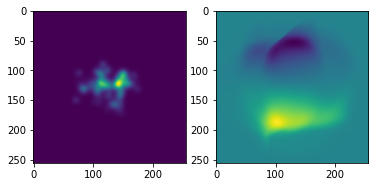

In [4]:
#dataset = datasets.CernDataset(train_folder, load_from_npy=True, start_moment=0, end_moment=8)
dataset = datasets.CernDatasetOneStepVelocities(train_folder, start_moment=0, end_moment=8,
                                                predict_type=1, modified_velocities=True)
x, y = dataset[9]

fig = plt.figure(figsize=(6,3))

fig.add_subplot(1, 2, 1)
plt.imshow(torch.squeeze(x))
fig.add_subplot(1, 2, 2)
plt.imshow(torch.squeeze(y))

In [6]:
batch_size = 4

data_size = len(dataset)
validation_fraction = .2

val_split = int(np.floor((validation_fraction) * data_size))
indices = list(range(data_size))
np.random.seed(42)
np.random.shuffle(indices)

val_indices, train_indices = indices[:val_split], indices[val_split:]

train_sampler = SubsetRandomSampler(train_indices)
val_sampler = SubsetRandomSampler(val_indices)

train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                           sampler=train_sampler)
val_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                         sampler=val_sampler)

In [15]:
from model import Unet, UnetEvo, DeepUnet
import torch.optim as optim

def unet_loss(output, target):
    loss = 0.5 * torch.sum(torch.abs(output - target)) / torch.sum(torch.abs(target))
    return loss

model = DeepUnet(hidden_size=64, in_channels=1)
device = torch.device("cuda:0")
model.to(device)

loss = unet_loss
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-6)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=4, gamma=0.5)

loss_history, val_history = train_model(model, train_loader, val_loader, loss, optimizer, 16, scheduler)

Average loss: 0.945853, Val loss: 0.793827
Average loss: 0.727999, Val loss: 0.866822
Average loss: 0.718065, Val loss: 1.480133
Average loss: 0.712404, Val loss: 1.361682
Average loss: 0.681522, Val loss: 1.331664
Average loss: 0.681776, Val loss: 1.083931
Average loss: 0.682840, Val loss: 1.519490
Average loss: 0.677920, Val loss: 0.690447
Average loss: 0.662050, Val loss: 0.697439
Average loss: 0.660989, Val loss: 1.263377
Average loss: 0.659088, Val loss: 1.084452
Average loss: 0.657602, Val loss: 0.697571
Average loss: 0.646348, Val loss: 1.093749
Average loss: 0.644244, Val loss: 0.980471
Average loss: 0.642701, Val loss: 0.776945
Average loss: 0.640151, Val loss: 0.999932


In [5]:
model = torch.load('../models/temp1.pth')

# 0 -> 8, Stacked Unet 2 layers

In [15]:
dataset = datasets.CernDataset(train_folder, load_from_npy=True, start_moment=0, end_moment=8)

batch_size = 4

data_size = len(dataset)
validation_fraction = .2

val_split = int(np.floor((validation_fraction) * data_size))
indices = list(range(data_size))
np.random.seed(42)
np.random.shuffle(indices)

val_indices, train_indices = indices[:val_split], indices[val_split:]

train_sampler = SubsetRandomSampler(train_indices)
val_sampler = SubsetRandomSampler(val_indices)

train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                           sampler=train_sampler)
val_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                         sampler=val_sampler)

In [19]:
from model import SUnet
import torch.optim as optim

def unet_loss(output, target):
    loss = 0.5 * torch.sum(torch.abs(output - target)) / torch.sum(torch.abs(target))
    return loss

model = SUnet()
device = torch.device("cuda:0")
model.to(device)

loss = unet_loss
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-3)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.5)

loss_history, val_history = train_model(model, train_loader, val_loader, loss, optimizer, 15, scheduler)

tensor(1.7741, device='cuda:0', grad_fn=<DivBackward0>)
tensor(1.4917, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.9984, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.4398, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.5205, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.4716, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.4393, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.4231, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.4394, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.4412, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.4301, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.4261, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.4168, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.4192, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.4394, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.4268, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.4249, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.4156, device='cuda:0', grad_fn=<DivBack

tensor(0.3075, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.3232, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2866, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.3125, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2925, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.3012, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2982, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.3197, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2977, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2877, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.3001, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.3149, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.3001, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.3005, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2938, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.3087, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2925, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2763, device='cuda:0', grad_fn=<DivBack

tensor(0.2980, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.3081, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2938, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2955, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.3132, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2867, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.3107, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.3128, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.3043, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2906, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2966, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.3103, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2823, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.3047, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.3171, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2921, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2948, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.3132, device='cuda:0', grad_fn=<DivBack

tensor(0.3093, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2884, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2679, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2632, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2697, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2910, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2615, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.3246, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.3192, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2809, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.3101, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.3124, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.3194, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.3140, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2953, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.3045, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2855, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.3008, device='cuda:0', grad_fn=<DivBack

tensor(0.3505, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2991, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.3218, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.3157, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2981, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.3054, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2893, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2880, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.3222, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.3188, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.3016, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2943, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2792, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2845, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.3083, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.3065, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.3182, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2937, device='cuda:0', grad_fn=<DivBack

tensor(0.3132, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2760, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2892, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.3060, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2556, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.3075, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2650, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2724, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2608, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2773, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2550, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2546, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2780, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2622, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2669, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2798, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2691, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2778, device='cuda:0', grad_fn=<DivBack

tensor(0.2883, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2540, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.3028, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2569, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2463, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.3073, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2835, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2761, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2620, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2437, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2658, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2654, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2620, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2638, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2704, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2518, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2682, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2421, device='cuda:0', grad_fn=<DivBack

tensor(0.2768, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2729, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2801, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2538, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2685, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2424, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2474, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2838, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2557, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2555, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2618, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2534, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2461, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2628, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2571, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2363, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2485, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2520, device='cuda:0', grad_fn=<DivBack

tensor(0.2697, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2827, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2805, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2622, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2717, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2898, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2692, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2447, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2955, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2586, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2633, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2813, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2857, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2614, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2641, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2429, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2671, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2679, device='cuda:0', grad_fn=<DivBack

tensor(0.2859, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2596, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2510, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2636, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2600, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2577, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2725, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2394, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2320, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2805, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.3057, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2456, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2638, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2515, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2408, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2256, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2489, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2572, device='cuda:0', grad_fn=<DivBack

tensor(0.2450, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2530, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2555, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2539, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2478, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2575, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2914, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2322, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2437, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2765, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2713, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2498, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2487, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2636, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2522, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2546, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2527, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2667, device='cuda:0', grad_fn=<DivBack

tensor(0.2330, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2430, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2643, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2400, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2502, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2442, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2712, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2479, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2432, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2380, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2354, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2505, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2455, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2730, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2234, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2644, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2439, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2446, device='cuda:0', grad_fn=<DivBack

tensor(0.2469, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2426, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2718, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2581, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2394, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2748, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2621, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2448, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2531, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2358, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2541, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2558, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2324, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2499, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2372, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2454, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2259, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2491, device='cuda:0', grad_fn=<DivBack

tensor(0.2448, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2321, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2216, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2467, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2567, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2757, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2290, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2241, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2484, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2607, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2445, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2390, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2529, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2484, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2450, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2614, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2170, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2250, device='cuda:0', grad_fn=<DivBack

tensor(0.2610, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2423, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2463, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2360, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2261, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2362, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2570, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2218, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2475, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2218, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2324, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2244, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2383, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2304, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2100, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2291, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2247, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2218, device='cuda:0', grad_fn=<DivBack

tensor(0.2450, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2759, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2315, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2502, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2656, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2661, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2497, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2372, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2487, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2251, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2471, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2303, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2173, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2304, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2520, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2333, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2281, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2443, device='cuda:0', grad_fn=<DivBack

tensor(0.2520, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2778, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2903, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2782, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2749, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2790, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2589, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2989, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2929, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.3037, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2761, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2947, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2805, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2892, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2876, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2962, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2779, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.3000, device='cuda:0', grad_fn=<DivBack

tensor(0.2794, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2677, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.3019, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2759, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2890, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2944, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2962, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2951, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2965, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2626, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2669, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2609, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2830, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2843, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2562, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.3044, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2776, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2696, device='cuda:0', grad_fn=<DivBack

tensor(0.2524, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2522, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2756, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2653, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2738, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2771, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2476, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2943, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2356, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2499, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2645, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2382, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2514, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2638, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2426, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2561, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2681, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2758, device='cuda:0', grad_fn=<DivBack

tensor(0.4105, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2968, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.3050, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.3281, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.3274, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.3066, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.3090, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.5668, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.2931, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.3308, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.3365, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.3345, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.3310, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.7253, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.5252, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.4951, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.5860, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.4587, device='cuda:0', grad_fn=<DivBack

KeyboardInterrupt: 

# 7 -> 8

### Unet based model

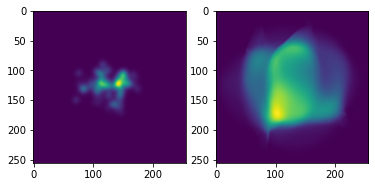

In [7]:
dataset = datasets.CernDataset(train_folder, load_from_npy=True, start_moment=0, end_moment=8)

x, y = dataset[9]

fig = plt.figure(figsize=(6,3))

fig.add_subplot(1, 2, 1)
plt.imshow(torch.squeeze(x))
fig.add_subplot(1, 2, 2)
plt.imshow(torch.squeeze(y))

In [8]:
batch_size = 8

data_size = len(dataset)
validation_fraction = .2

val_split = int(np.floor((validation_fraction) * data_size))
indices = list(range(data_size))
np.random.seed(42)
np.random.shuffle(indices)

val_indices, train_indices = indices[:val_split], indices[val_split:]

train_sampler = SubsetRandomSampler(train_indices)
val_sampler = SubsetRandomSampler(val_indices)

train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                           sampler=train_sampler)
val_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                         sampler=val_sampler)

In [9]:
from model import Unet, UnetEvo, UnetEvoMod
import torch.optim as optim

def unet_loss(output, target):
    loss = 0.5 * torch.sum(torch.abs(output - target)) / torch.sum(torch.abs(target))
    return loss

model = Unet(hidden_size=64)
device = torch.device("cuda:0")
model.to(device)

loss = unet_loss
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-3)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

loss_history, val_history = train_model(model, train_loader, val_loader, loss, optimizer, 15, scheduler)

Average loss: 0.311166, Val loss: 0.288228
Average loss: 0.283735, Val loss: 0.278918
Average loss: 0.281603, Val loss: 0.278950
Average loss: 0.288060, Val loss: 0.278189
Average loss: 0.285145, Val loss: 0.288628
Average loss: 0.270879, Val loss: 0.268540
Average loss: 0.272867, Val loss: 0.285206
Average loss: 0.274791, Val loss: 0.266183
Average loss: 0.274426, Val loss: 0.267804
Average loss: 0.270055, Val loss: 0.265076
Average loss: 0.263256, Val loss: 0.259124
Average loss: 0.262347, Val loss: 0.263761
Average loss: 0.261298, Val loss: 0.258072
Average loss: 0.259131, Val loss: 0.254886
Average loss: 0.258220, Val loss: 0.256253


### Simple CNN Model

In [8]:
from model import ConvNet
import torch.optim as optim

def unet_loss(output, target):
    loss = 0.5 * torch.sum(torch.abs(output - target)) / torch.sum(torch.abs(target))
    return loss

model = ConvNet()
device = torch.device("cuda:0")
model.to(device)

loss = unet_loss
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-3)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.5)

loss_history, val_history = train_model(model, train_loader, val_loader, loss, optimizer, 100, scheduler)

Average loss: 0.100270, Val loss: 0.083463
Average loss: 0.082638, Val loss: 0.077861
Average loss: 0.081102, Val loss: 0.080654


KeyboardInterrupt: 

In [2]:
from torch.utils.data.sampler import Sampler

class SubsetSampler(Sampler):
    def __init__(self, indices):
        self.indices = indices

    def __iter__(self):
        return (self.indices[i] for i in range(len(self.indices)))

    def __len__(self):
        return len(self.indices)

model.eval()
indices = list(range(20))
sampler = SubsetSampler(indices)
loader = torch.utils.data.DataLoader(dataset,
                                     sampler=sampler)
'''
device=torch.device("cpu")
model.to(device)
t = iter(loader)
next(t)
#next(t)
#next(t)
x, y = next(t)
x = x.to(device)
'''

NameError: name 'model' is not defined

In [22]:
%%time
model.eval()
prediction = model(x)

Wall time: 50 s


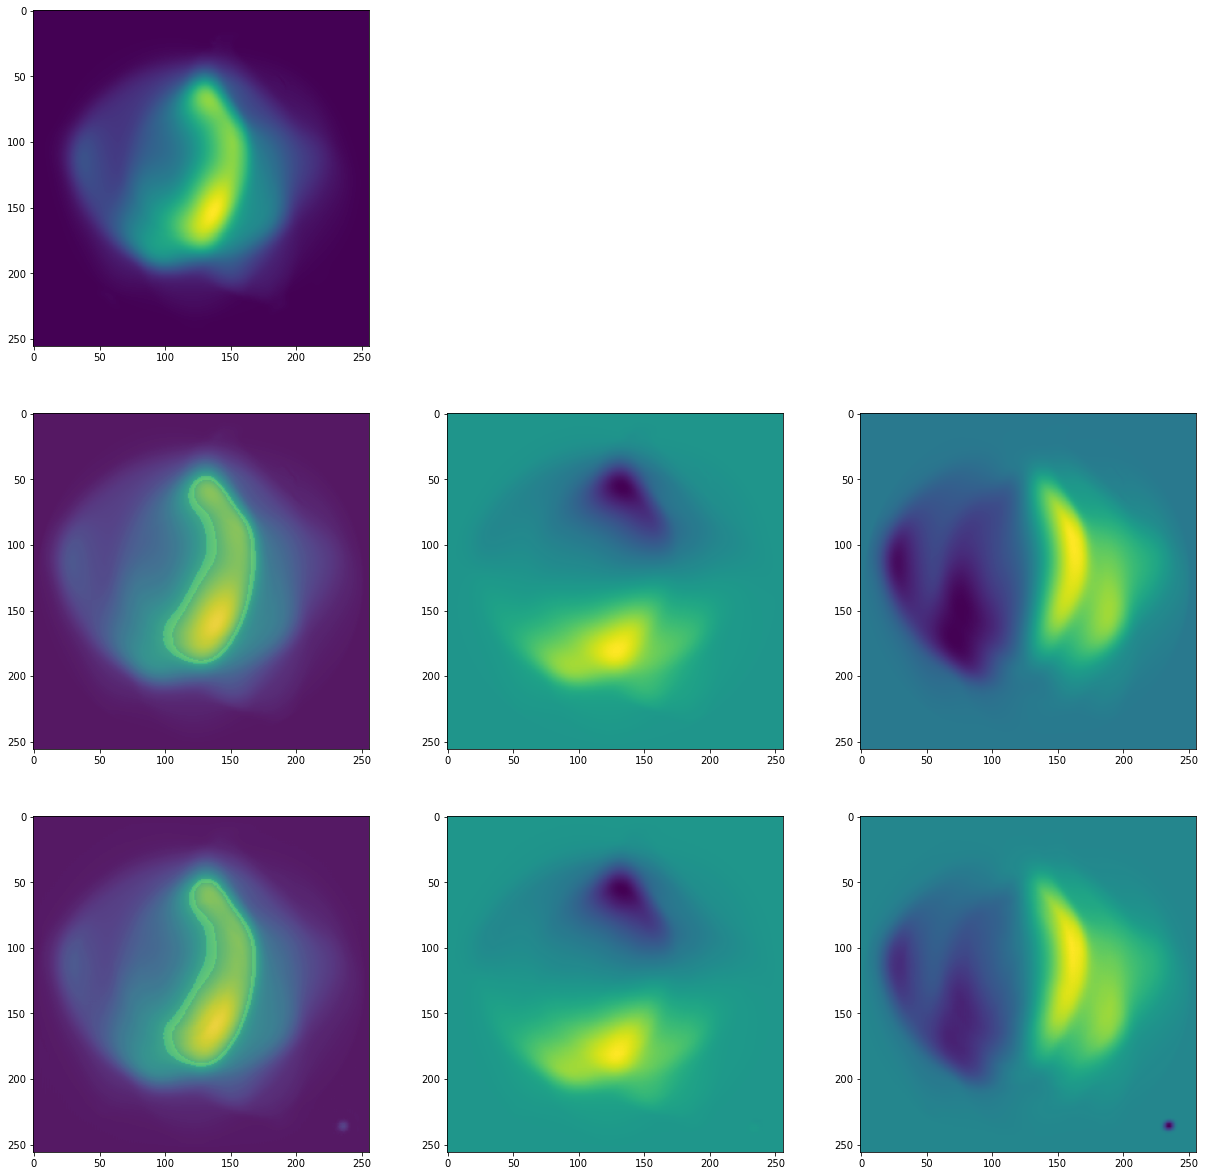

In [23]:
import matplotlib.pyplot as plt
EPS = 0.01
fig = plt.figure(figsize=(21,21))
  
prediction = prediction.detach().cpu()
fig.add_subplot(3, 3, 1)
plt.imshow(torch.squeeze(x))
#fig.add_subplot(3, 3, 2)
#plt.imshow(torch.squeeze(x)[1])
#fig.add_subplot(3, 3, 3)
#plt.imshow(torch.squeeze(x)[2])
fig.add_subplot(3, 3, 4)
plt.imshow(torch.squeeze(y)[0],alpha=0.9)
plt.imshow(np.abs(torch.squeeze(y)[0] - 0.18) < EPS,alpha=0.1)
fig.add_subplot(3, 3, 5)
plt.imshow(torch.squeeze(y)[1])
fig.add_subplot(3, 3, 6)
plt.imshow(torch.squeeze(y)[2])
fig.add_subplot(3, 3, 7)
plt.imshow(torch.squeeze(prediction)[0], alpha=0.9)
plt.imshow(np.abs(torch.squeeze(prediction)[0] - 0.18) < EPS, alpha=0.1)
fig.add_subplot(3, 3, 8)
plt.imshow(torch.squeeze(prediction)[1])
fig.add_subplot(3, 3, 9)
plt.imshow(torch.squeeze(prediction)[2])
plt.savefig('../plots/du7816ep13_prediction2.png')

torch.Size([1, 256, 256])


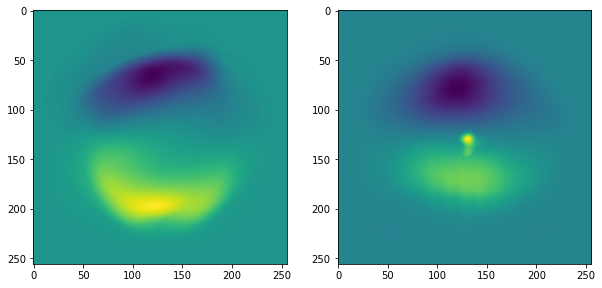

In [8]:
fig = plt.figure(figsize=(10, 5))
  
print(y.shape)
prediction = prediction.detach().cpu()

fig.add_subplot(1, 2, 1)
plt.imshow(torch.squeeze(y))
fig.add_subplot(1, 2, 2)
plt.imshow(torch.squeeze(prediction))


torch.Size([1, 3, 256, 256])


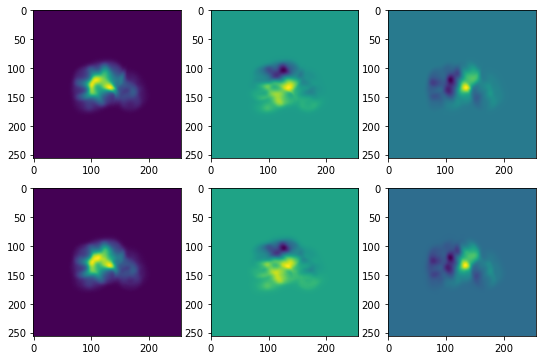

In [13]:
fig = plt.figure(figsize=(9,6))
  
print(y.shape)
prediction = prediction.detach().cpu()

fig.add_subplot(2, 3, 1)
plt.imshow(torch.squeeze(y)[0])
fig.add_subplot(2, 3, 2)
plt.imshow(torch.squeeze(y)[1])
fig.add_subplot(2, 3, 3)
plt.imshow(torch.squeeze(y)[2])
fig.add_subplot(2, 3, 4)
plt.imshow(torch.squeeze(prediction)[0])
fig.add_subplot(2, 3, 5)
plt.imshow(torch.squeeze(prediction)[1])
fig.add_subplot(2, 3, 6)
plt.imshow(torch.squeeze(prediction)[2])
plt.show()

# Закладывание скоростей

In [6]:
train_folder = 'D:/CernDataset'
dataset = datasets.CernDatasetOneStepVelocities(train_folder, start_moment=0, end_moment=1)

In [9]:
y.shape

torch.Size([256, 256])

TypeError: Invalid shape (256,) for image data

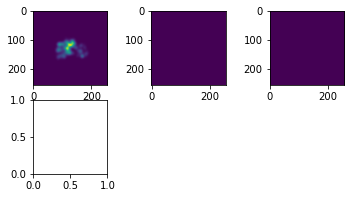

In [7]:
x, y = dataset[0]

fig = plt.figure(figsize=(6,3))

fig.add_subplot(2, 3, 1)
plt.imshow(torch.squeeze(x[0]))
fig.add_subplot(2, 3, 2)
plt.imshow(torch.squeeze(x[1]))
fig.add_subplot(2, 3, 3)
plt.imshow(torch.squeeze(x[2]))

fig.add_subplot(2, 3, 4)
plt.imshow(torch.squeeze(y[0]))
fig.add_subplot(2, 3, 5)
plt.imshow(torch.squeeze(y[1]))
fig.add_subplot(2, 3, 6)
plt.imshow(torch.squeeze(y[2]))

In [5]:
batch_size = 2

data_size = len(dataset)
validation_fraction = .2

val_split = int(np.floor((validation_fraction) * data_size))
indices = list(range(data_size))
np.random.seed(42)
np.random.shuffle(indices)

val_indices, train_indices = indices[:val_split], indices[val_split:]

train_sampler = SubsetRandomSampler(train_indices)
val_sampler = SubsetRandomSampler(val_indices)

train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                           sampler=train_sampler)
val_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                         sampler=val_sampler)

In [ ]:
from model import Unet, UnetEvo, UnetEvoMod
import torch.optim as optim

def unet_loss(output, target):
    return 0.5 * torch.sum(torch.sum(torch.abs(output - target), dim=(2,3)) / torch.sum(torch.abs(target), dim=(2,3)))

model = Unet(hidden_size=64, in_channels=3, out_dim=3)
device = torch.device("cuda:0")
model.to(device)

loss = unet_loss
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-3)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

loss_history, val_history = train_model(model, train_loader, val_loader, loss, optimizer, 100, scheduler)

# Предсказание 1 компоненты

In [10]:
train_folder = 'D:/CernDataset'
dataset = datasets.CernDatasetOneStepVelocities(train_folder, start_moment=7, end_moment=8,
                                                predict_type=0)

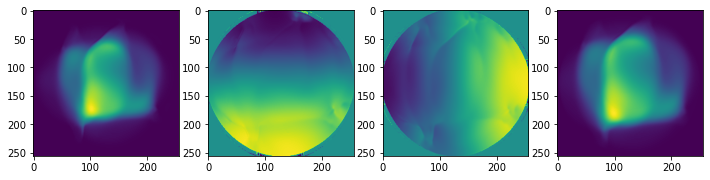

In [11]:
x, y = dataset[9]

fig = plt.figure(figsize=(12,3))

fig.add_subplot(1, 4, 1)
plt.imshow(torch.squeeze(x[0]))
fig.add_subplot(1, 4, 2)
plt.imshow(torch.squeeze(x[1]))
fig.add_subplot(1, 4, 3)
plt.imshow(torch.squeeze(x[2]))

fig.add_subplot(1, 4, 4)
plt.imshow(torch.squeeze(y))

In [35]:
batch_size = 2

data_size = len(dataset)
validation_fraction = .2

val_split = int(np.floor((validation_fraction) * data_size))
indices = list(range(data_size))
np.random.seed(42)
np.random.shuffle(indices)

val_indices, train_indices = indices[:val_split], indices[val_split:]

train_sampler = SubsetRandomSampler(train_indices)
val_sampler = SubsetRandomSampler(val_indices)

train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                           sampler=train_sampler)
val_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                         sampler=val_sampler)

In [36]:
from model import Unet, UnetEvo, UnetEvoMod
import torch.optim as optim

# def unet_loss(output, target):
#     return 0.5 * torch.sum(torch.sum(torch.abs(output - target), dim=(2,3)) / torch.sum(torch.abs(target), dim=(2,3)))

def unet_loss(output, target):
    return 0.5 * torch.sum(torch.abs(output - target)) / torch.sum(torch.abs(target))

model = Unet(hidden_size=64, in_channels=3, out_dim=1)
device = torch.device("cuda:0")
model.to(device)

loss = unet_loss
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-8)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

loss_history, val_history = train_model(model, train_loader, val_loader, loss, optimizer, 100, scheduler)

Average loss: 0.362994, Val loss: 0.288155
Average loss: 0.282719, Val loss: 0.271500
Average loss: 0.272271, Val loss: 0.268084
Average loss: 0.267140, Val loss: 0.269723
Average loss: 0.262182, Val loss: 0.268575
Average loss: 118050.937567, Val loss: 39.005779
Average loss: 8.434948, Val loss: 18.144946
Average loss: 4.043377, Val loss: 4.696643
Average loss: 4.145511, Val loss: 2.752715
Average loss: 3.041086, Val loss: 3.402925
Average loss: 1.389784, Val loss: 1.180129
Average loss: 1.376327, Val loss: 1.807231
Average loss: 1.918396, Val loss: 1.492716
Average loss: 1.771103, Val loss: 0.909346
Average loss: 1.436527, Val loss: 3.338473
Average loss: 0.928458, Val loss: 0.795692
Average loss: 0.814660, Val loss: 0.740420
Average loss: 0.983123, Val loss: 2.072700
Average loss: 1.338785, Val loss: 1.545075
Average loss: 1.008254, Val loss: 0.763120
Average loss: 0.686092, Val loss: 0.677225
Average loss: 0.696695, Val loss: 0.748870
Average loss: 0.788405, Val loss: 1.471824
Aver

KeyboardInterrupt: 

# Предсказание одной компоненты по 3м
$V_x = V_x \cdot E_d$

In [5]:
train_folder = 'D:/CernDataset'
dataset = datasets.CernDatasetOneStepVelocities(train_folder, start_moment=7, end_moment=8,
                                                predict_type=0, modified_velocities=True)

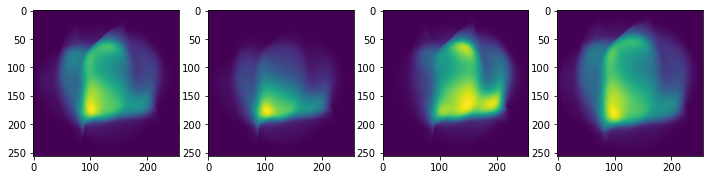

In [6]:
x, y = dataset[9]

fig = plt.figure(figsize=(12,3))

fig.add_subplot(1, 4, 1)
plt.imshow(torch.squeeze(x[0]))
fig.add_subplot(1, 4, 2)
plt.imshow(torch.squeeze(x[1]))
fig.add_subplot(1, 4, 3)
plt.imshow(torch.squeeze(x[2]))

fig.add_subplot(1, 4, 4)
plt.imshow(torch.squeeze(y))

In [7]:
batch_size = 1

data_size = len(dataset)
validation_fraction = .2

val_split = int(np.floor((validation_fraction) * data_size))
indices = list(range(data_size))
np.random.seed(42)
np.random.shuffle(indices)

val_indices, train_indices = indices[:val_split], indices[val_split:]

train_sampler = SubsetRandomSampler(train_indices)
val_sampler = SubsetRandomSampler(val_indices)

train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                           sampler=train_sampler)
val_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                         sampler=val_sampler)

In [8]:
from model import Unet, UnetEvo, UnetEvoMod
import torch.optim as optim

# def unet_loss(output, target):
#     return 0.5 * torch.sum(torch.sum(torch.abs(output - target), dim=(2,3)) / torch.sum(torch.abs(target), dim=(2,3)))

def unet_loss(output, target):
    return 0.5 * torch.sum(torch.abs(output - target)) / torch.sum(torch.abs(target))

model = Unet(hidden_size=200, in_channels=3, out_dim=1)
device = torch.device("cuda:0")
model.to(device)

loss = unet_loss
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-3)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.5)

loss_history, val_history = train_model(model, train_loader, val_loader, loss, optimizer, 4, scheduler)

Average loss: 0.132349, Val loss: 0.260892
Average loss: 0.090412, Val loss: 0.055395
Average loss: 0.074766, Val loss: 0.027547
Average loss: 0.068141, Val loss: 0.167703


In [10]:
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-3)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.5)

loss_history, val_history = train_model(model, train_loader, val_loader, loss, optimizer, 4, scheduler)

Average loss: 0.017822, Val loss: 0.023654
Average loss: 0.017336, Val loss: 0.019482
Average loss: 0.014286, Val loss: 0.013340
Average loss: 0.013778, Val loss: 0.013191


In [11]:
torch.save(model, 'Unet200EXYmod78.pth')

## Попытка 2

In [22]:
batch_size = 4

data_size = len(dataset)
validation_fraction = .2

val_split = int(np.floor((validation_fraction) * data_size))
indices = list(range(data_size))
np.random.seed(42)
np.random.shuffle(indices)

val_indices, train_indices = indices[:val_split], indices[val_split:]

train_sampler = SubsetRandomSampler(train_indices)
val_sampler = SubsetRandomSampler(val_indices)

train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                           sampler=train_sampler)
val_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                         sampler=val_sampler)

In [23]:
from model import MultiPathUnet
import torch.optim as optim

# def unet_loss(output, target):
#     return 0.5 * torch.sum(torch.sum(torch.abs(output - target), dim=(2,3)) / torch.sum(torch.abs(target), dim=(2,3)))

def unet_loss(output, target):
    return 0.5 * torch.sum(torch.abs(output - target)) / torch.sum(torch.abs(target))

model = MultiPathUnet()
device = torch.device("cuda:0")
model.to(device)

loss = unet_loss
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-3)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

loss_history, val_history = train_model(model, train_loader, val_loader, loss, optimizer, 30, scheduler)

Average loss: 0.652573, Val loss: 0.609625
Average loss: 0.622056, Val loss: 0.607884
Average loss: 0.612677, Val loss: 0.603687
Average loss: 0.610532, Val loss: 0.604891
Average loss: 0.605310, Val loss: 0.612544
Average loss: 0.595921, Val loss: 0.600059
Average loss: 0.594900, Val loss: 0.592969
Average loss: 0.595012, Val loss: 0.589950
Average loss: 0.592803, Val loss: 0.594438
Average loss: 6273.155376, Val loss: 0.726619
Average loss: 0.779216, Val loss: 0.778687
Average loss: 0.820213, Val loss: 0.834436
Average loss: 0.685821, Val loss: 0.708061
Average loss: 0.653622, Val loss: 0.718293
Average loss: 1.308046, Val loss: 0.602814
Average loss: 0.601081, Val loss: 0.605592
Average loss: 0.600773, Val loss: 0.593940
Average loss: 0.602152, Val loss: 0.629214
Average loss: 0.599158, Val loss: 0.586769
Average loss: 0.599199, Val loss: 0.595809
Average loss: 0.592450, Val loss: 0.596016
Average loss: 0.591846, Val loss: 0.585835
Average loss: 0.588915, Val loss: 0.592286
Average 

### Попытка 3

In [19]:
batch_size = 4

data_size = len(dataset)
validation_fraction = .2

val_split = int(np.floor((validation_fraction) * data_size))
indices = list(range(data_size))
np.random.seed(42)
np.random.shuffle(indices)

val_indices, train_indices = indices[:val_split], indices[val_split:]

train_sampler = SubsetRandomSampler(train_indices)
val_sampler = SubsetRandomSampler(val_indices)

train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                           sampler=train_sampler)
val_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                         sampler=val_sampler)

In [20]:
from model import MIConvNet
import torch.optim as optim

# def unet_loss(output, target):
#     return 0.5 * torch.sum(torch.sum(torch.abs(output - target), dim=(2,3)) / torch.sum(torch.abs(target), dim=(2,3)))

def unet_loss(output, target):
    return 0.5 * torch.sum(torch.abs(output - target)) / torch.sum(torch.abs(target))

model = MIConvNet()
device = torch.device("cuda:0")
model.to(device)

loss = unet_loss
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-3)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

loss_history, val_history = train_model(model, train_loader, val_loader, loss, optimizer, 30, scheduler)

Average loss: 0.717153, Val loss: 0.657738


KeyboardInterrupt: 

# Предсказание 3 компонент по 3
## 0 -> 1

In [28]:
train_folder = 'D:/CernDataset'
dataset = datasets.CernDatasetOneStepVelocities(train_folder, start_moment=6, end_moment=7,
                                                predict_type=-1, modified_velocities=True,
                                               use_init_velocities=True)
batch_size = 3

data_size = len(dataset)
validation_fraction = .2

val_split = int(np.floor((validation_fraction) * data_size))
indices = list(range(data_size))
np.random.seed(42)
np.random.shuffle(indices)

val_indices, train_indices = indices[:val_split], indices[val_split:]

train_sampler = SubsetRandomSampler(train_indices)
val_sampler = SubsetRandomSampler(val_indices)

train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                           sampler=train_sampler)
val_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                         sampler=val_sampler)

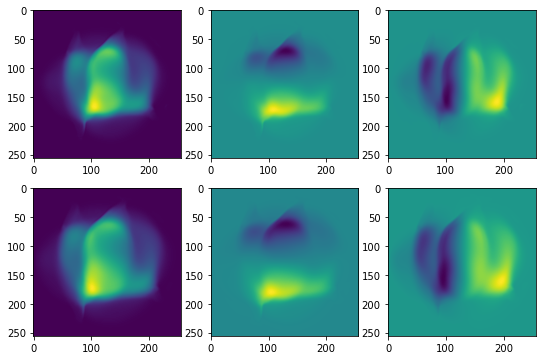

In [29]:
x, y = dataset[9]

fig = plt.figure(figsize=(9,6))

fig.add_subplot(2, 3, 1)
plt.imshow(torch.squeeze(x[0]))
fig.add_subplot(2, 3, 2)
plt.imshow(torch.squeeze(x[1]))
fig.add_subplot(2, 3, 3)
plt.imshow(torch.squeeze(x[2]))

fig.add_subplot(2, 3, 4)
plt.imshow(torch.squeeze(y[0]))
fig.add_subplot(2, 3, 5)
plt.imshow(torch.squeeze(y[1]))
fig.add_subplot(2, 3, 6)
plt.imshow(torch.squeeze(y[2]))

In [30]:
from model import Unet, DeepUnet, UnetEvo
import torch.optim as optim

def unet_loss(output, target):
    return 0.5 * torch.sum(torch.sum(torch.abs(output - target), dim=(2,3)) / torch.sum(torch.abs(target), dim=(2,3)))

# def unet_loss(output, target):
#     return 0.5 * torch.sum(torch.abs(output - target)) / torch.sum(torch.abs(target))

model = DeepUnet(in_channels=3, out_dim=3, hidden_size=90)
device = torch.device("cuda:0")
model.to(device)

loss = unet_loss
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=4, gamma=0.5)

loss_history, val_history = train_model(model, train_loader, val_loader, loss, optimizer, 16, scheduler)

Average loss: 0.948002, Val loss: 0.758739
Average loss: 0.629088, Val loss: 0.651733
Average loss: 0.561368, Val loss: 0.442811
Average loss: 0.526660, Val loss: 0.392101
Average loss: 0.420747, Val loss: 0.298479
Average loss: 0.415274, Val loss: 0.191690
Average loss: 0.391988, Val loss: 0.313666
Average loss: 0.395318, Val loss: 0.211947
Average loss: 0.351995, Val loss: 0.272542
Average loss: 0.355037, Val loss: 0.216555
Average loss: 0.344308, Val loss: 0.176166
Average loss: 0.340275, Val loss: 0.127800
Average loss: 0.332186, Val loss: 0.141635
Average loss: 0.319714, Val loss: 0.227620
Average loss: 0.310603, Val loss: 0.240374
Average loss: 0.303504, Val loss: 0.277229


In [31]:
torch.save(model, '../models/du6716ep.pth')
del model
torch.cuda.empty_cache()

In [32]:
dataset = datasets.CernDatasetOneStepVelocities(train_folder, start_moment=5, end_moment=6,
                                                predict_type=-1, modified_velocities=True,
                                               use_init_velocities=True)
batch_size = 3

data_size = len(dataset)
validation_fraction = .2

val_split = int(np.floor((validation_fraction) * data_size))
indices = list(range(data_size))
np.random.seed(42)
np.random.shuffle(indices)

val_indices, train_indices = indices[:val_split], indices[val_split:]

train_sampler = SubsetRandomSampler(train_indices)
val_sampler = SubsetRandomSampler(val_indices)

train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                           sampler=train_sampler)
val_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                         sampler=val_sampler)


model = DeepUnet(in_channels=3, out_dim=3, hidden_size=90)
device = torch.device("cuda:0")
model.to(device)

loss = unet_loss
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=4, gamma=0.5)

loss_history, val_history = train_model(model, train_loader, val_loader, loss, optimizer, 16, scheduler)

Average loss: 1.047367, Val loss: 0.533084
Average loss: 0.620619, Val loss: 0.547275
Average loss: 0.561619, Val loss: 0.686643
Average loss: 0.550511, Val loss: 1.169051
Average loss: 0.433643, Val loss: 0.324305
Average loss: 0.411494, Val loss: 0.420511
Average loss: 0.401403, Val loss: 0.200790
Average loss: 0.387652, Val loss: 0.196969
Average loss: 0.342463, Val loss: 0.250207
Average loss: 0.347489, Val loss: 0.140999
Average loss: 0.344557, Val loss: 0.162895
Average loss: 0.341789, Val loss: 0.137641
Average loss: 0.314679, Val loss: 0.124720
Average loss: 0.312096, Val loss: 0.232111
Average loss: 0.305918, Val loss: 0.179644
Average loss: 0.305237, Val loss: 0.235017


In [33]:
torch.save(model, '../models/du5616ep.pth')
del model
torch.cuda.empty_cache()

In [34]:
dataset = datasets.CernDatasetOneStepVelocities(train_folder, start_moment=4, end_moment=5,
                                                predict_type=-1, modified_velocities=True,
                                               use_init_velocities=True)
batch_size = 3

data_size = len(dataset)
validation_fraction = .2

val_split = int(np.floor((validation_fraction) * data_size))
indices = list(range(data_size))
np.random.seed(42)
np.random.shuffle(indices)

val_indices, train_indices = indices[:val_split], indices[val_split:]

train_sampler = SubsetRandomSampler(train_indices)
val_sampler = SubsetRandomSampler(val_indices)

train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                           sampler=train_sampler)
val_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                         sampler=val_sampler)


model = DeepUnet(in_channels=3, out_dim=3, hidden_size=90)
device = torch.device("cuda:0")
model.to(device)

loss = unet_loss
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=4, gamma=0.5)

loss_history, val_history = train_model(model, train_loader, val_loader, loss, optimizer, 16, scheduler)

Average loss: 0.978952, Val loss: 0.730817
Average loss: 0.600884, Val loss: 0.928141
Average loss: 0.589218, Val loss: 0.761971
Average loss: 0.562507, Val loss: 0.507708
Average loss: 0.454515, Val loss: 0.273070
Average loss: 0.407894, Val loss: 0.529637
Average loss: 0.410174, Val loss: 0.299872
Average loss: 0.427055, Val loss: 0.165880
Average loss: 0.351854, Val loss: 0.193526
Average loss: 0.350166, Val loss: 0.175009
Average loss: 0.349479, Val loss: 0.174457
Average loss: 0.358610, Val loss: 0.146495
Average loss: 0.313558, Val loss: 0.157757
Average loss: 0.318240, Val loss: 0.270977
Average loss: 0.304701, Val loss: 0.122382
Average loss: 0.305620, Val loss: 0.135471


In [35]:
torch.save(model, '../models/du4516ep.pth')
del model
torch.cuda.empty_cache()

In [36]:
dataset = datasets.CernDatasetOneStepVelocities(train_folder, start_moment=3, end_moment=4,
                                                predict_type=-1, modified_velocities=True,
                                               use_init_velocities=True)
batch_size = 3

data_size = len(dataset)
validation_fraction = .2

val_split = int(np.floor((validation_fraction) * data_size))
indices = list(range(data_size))
np.random.seed(42)
np.random.shuffle(indices)

val_indices, train_indices = indices[:val_split], indices[val_split:]

train_sampler = SubsetRandomSampler(train_indices)
val_sampler = SubsetRandomSampler(val_indices)

train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                           sampler=train_sampler)
val_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                         sampler=val_sampler)


model = DeepUnet(in_channels=3, out_dim=3, hidden_size=90)
device = torch.device("cuda:0")
model.to(device)

loss = unet_loss
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=4, gamma=0.5)

loss_history, val_history = train_model(model, train_loader, val_loader, loss, optimizer, 16, scheduler)

Average loss: 0.999040, Val loss: 0.550376
Average loss: 0.565598, Val loss: 0.396348
Average loss: 0.542384, Val loss: 0.413364
Average loss: 0.504848, Val loss: 0.525134
Average loss: 0.398602, Val loss: 0.197122
Average loss: 0.408122, Val loss: 0.369430
Average loss: 0.395583, Val loss: 0.264441
Average loss: 0.385594, Val loss: 0.277991
Average loss: 0.330913, Val loss: 0.152844
Average loss: 0.331111, Val loss: 0.259043
Average loss: 0.320558, Val loss: 0.142987
Average loss: 0.328527, Val loss: 0.245825
Average loss: 0.297477, Val loss: 0.133484
Average loss: 0.292386, Val loss: 0.147270
Average loss: 0.298370, Val loss: 0.112044
Average loss: 0.292021, Val loss: 0.130143


In [37]:
torch.save(model, '../models/du3416ep.pth')
del model
torch.cuda.empty_cache()

In [38]:
dataset = datasets.CernDatasetOneStepVelocities(train_folder, start_moment=2, end_moment=3,
                                                predict_type=-1, modified_velocities=True,
                                               use_init_velocities=True)
batch_size = 3

data_size = len(dataset)
validation_fraction = .2

val_split = int(np.floor((validation_fraction) * data_size))
indices = list(range(data_size))
np.random.seed(42)
np.random.shuffle(indices)

val_indices, train_indices = indices[:val_split], indices[val_split:]

train_sampler = SubsetRandomSampler(train_indices)
val_sampler = SubsetRandomSampler(val_indices)

train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                           sampler=train_sampler)
val_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                         sampler=val_sampler)


model = DeepUnet(in_channels=3, out_dim=3, hidden_size=90)
device = torch.device("cuda:0")
model.to(device)

loss = unet_loss
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=4, gamma=0.5)

loss_history, val_history = train_model(model, train_loader, val_loader, loss, optimizer, 16, scheduler)

Average loss: 0.857278, Val loss: 0.662489
Average loss: 0.670345, Val loss: 0.603923
Average loss: 0.604541, Val loss: 0.482895
Average loss: 0.549842, Val loss: 0.425672
Average loss: 0.432791, Val loss: 0.294345
Average loss: 0.413908, Val loss: 0.240035
Average loss: 0.388702, Val loss: 0.240594
Average loss: 0.384270, Val loss: 0.436737
Average loss: 0.339647, Val loss: 0.168044
Average loss: 0.330746, Val loss: 0.165163
Average loss: 0.327581, Val loss: 0.149824
Average loss: 0.324991, Val loss: 0.131773
Average loss: 0.300177, Val loss: 0.101283
Average loss: 0.302454, Val loss: 0.101575
Average loss: 0.302247, Val loss: 0.118786
Average loss: 0.289473, Val loss: 0.136988


In [39]:
torch.save(model, '../models/du2316ep.pth')
del model
torch.cuda.empty_cache()

In [40]:
dataset = datasets.CernDatasetOneStepVelocities(train_folder, start_moment=1, end_moment=2,
                                                predict_type=-1, modified_velocities=True,
                                               use_init_velocities=True)
batch_size = 3

data_size = len(dataset)
validation_fraction = .2

val_split = int(np.floor((validation_fraction) * data_size))
indices = list(range(data_size))
np.random.seed(42)
np.random.shuffle(indices)

val_indices, train_indices = indices[:val_split], indices[val_split:]

train_sampler = SubsetRandomSampler(train_indices)
val_sampler = SubsetRandomSampler(val_indices)

train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                           sampler=train_sampler)
val_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                         sampler=val_sampler)


model = DeepUnet(in_channels=3, out_dim=3, hidden_size=90)
device = torch.device("cuda:0")
model.to(device)

loss = unet_loss
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=4, gamma=0.5)

loss_history, val_history = train_model(model, train_loader, val_loader, loss, optimizer, 16, scheduler)

Average loss: 0.791227, Val loss: 0.664620
Average loss: 0.603519, Val loss: 0.497639
Average loss: 0.549675, Val loss: 0.343110
Average loss: 0.515890, Val loss: 0.372884
Average loss: 0.420393, Val loss: 0.273233
Average loss: 0.417976, Val loss: 0.293391
Average loss: 0.405638, Val loss: 0.306724
Average loss: 0.401975, Val loss: 0.207115
Average loss: 0.346248, Val loss: 0.191587
Average loss: 0.347805, Val loss: 0.175684
Average loss: 0.344085, Val loss: 0.123362
Average loss: 0.343072, Val loss: 0.251781
Average loss: 0.316393, Val loss: 0.112890
Average loss: 0.321133, Val loss: 0.210960
Average loss: 0.318292, Val loss: 0.306496
Average loss: 0.319540, Val loss: 0.106296


In [41]:
torch.save(model, '../models/du1216ep.pth')
del model
torch.cuda.empty_cache()

In [42]:
dataset = datasets.CernDatasetOneStepVelocities(train_folder, start_moment=0, end_moment=1,
                                                predict_type=-1, modified_velocities=True,
                                               use_init_velocities=False)
batch_size = 3

data_size = len(dataset)
validation_fraction = .2

val_split = int(np.floor((validation_fraction) * data_size))
indices = list(range(data_size))
np.random.seed(42)
np.random.shuffle(indices)

val_indices, train_indices = indices[:val_split], indices[val_split:]

train_sampler = SubsetRandomSampler(train_indices)
val_sampler = SubsetRandomSampler(val_indices)

train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                           sampler=train_sampler)
val_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                         sampler=val_sampler)


model = DeepUnet(in_channels=1, out_dim=3, hidden_size=90)
device = torch.device("cuda:0")
model.to(device)

loss = unet_loss
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=4, gamma=0.5)

loss_history, val_history = train_model(model, train_loader, val_loader, loss, optimizer, 16, scheduler)

Average loss: 0.735800, Val loss: 0.610906
Average loss: 0.552087, Val loss: 0.821942
Average loss: 0.523313, Val loss: 0.587839
Average loss: 0.499306, Val loss: 0.479087
Average loss: 0.417780, Val loss: 0.312214
Average loss: 0.410498, Val loss: 0.307958
Average loss: 0.402120, Val loss: 0.268056
Average loss: 0.394678, Val loss: 0.240937
Average loss: 0.360853, Val loss: 0.182898
Average loss: 0.354939, Val loss: 0.128074
Average loss: 0.351749, Val loss: 0.213408
Average loss: 0.347660, Val loss: 0.216526
Average loss: 0.326473, Val loss: 0.196977
Average loss: 0.329435, Val loss: 0.162402
Average loss: 0.325392, Val loss: 0.143934
Average loss: 0.329061, Val loss: 0.194155


In [43]:
torch.save(model, '../models/du0116ep.pth')
del model
torch.cuda.empty_cache()

Результат обучения du7816ep13.pth

In [ ]:
Average loss: 1.579056, Val loss: 0.875006
Average loss: 0.668593, Val loss: 0.724446
Average loss: 0.579978, Val loss: 0.580877
Average loss: 0.550858, Val loss: 0.623966
Average loss: 0.429796, Val loss: 0.293982
Average loss: 0.424306, Val loss: 0.419193
Average loss: 0.422022, Val loss: 0.449226
Average loss: 0.399444, Val loss: 0.891076
Average loss: 0.320271, Val loss: 0.446954
Average loss: 0.225021, Val loss: 0.247041
Average loss: 0.192544, Val loss: 0.435181
Average loss: 0.186731, Val loss: 0.726522
Average loss: 0.141805, Val loss: 0.310877
Average loss: 0.138454, Val loss: 0.194214
Average loss: 0.133433, Val loss: 0.242143
Average loss: 0.131034, Val loss: 0.142219

Результат обучения моделей предсказывающих 3 компоненты по 3. Из 7 этапа предсказывался 8. du7816ep, Используется батчнорм

In [ ]:
Average loss: 1.002181, Val loss: 0.886967
Average loss: 0.605738, Val loss: 0.487023
Average loss: 0.588121, Val loss: 0.460113
Average loss: 0.522527, Val loss: 0.444275
Average loss: 0.435074, Val loss: 0.329882
Average loss: 0.437697, Val loss: 0.240465
Average loss: 0.421085, Val loss: 0.202682
Average loss: 0.419696, Val loss: 0.273869
Average loss: 0.355962, Val loss: 0.192944
Average loss: 0.352162, Val loss: 0.209963
Average loss: 0.348248, Val loss: 0.153150
Average loss: 0.347692, Val loss: 0.210321
Average loss: 0.294570, Val loss: 0.197893
Average loss: 0.210689, Val loss: 0.101715
Average loss: 0.160691, Val loss: 0.109039
Average loss: 0.139104, Val loss: 0.137029

Результат обучения моделей предсказывающих 3 компоненты по 1. Из 0 этапа предсказывался 8

In [ ]:
ue0816ep
Average loss: 2.581349, Val loss: 1.613358
Average loss: 1.048795, Val loss: 1.250039
Average loss: 0.916483, Val loss: 1.377101
Average loss: 0.835730, Val loss: 0.750662
Average loss: 0.666322, Val loss: 0.513918
Average loss: 0.642936, Val loss: 0.637182
Average loss: 0.614635, Val loss: 0.918123
Average loss: 0.591048, Val loss: 0.499917
Average loss: 0.510714, Val loss: 0.313604
Average loss: 0.498061, Val loss: 0.505310
Average loss: 0.491266, Val loss: 0.607595
Average loss: 0.490834, Val loss: 0.403736
Average loss: 0.435090, Val loss: 0.277580
Average loss: 0.443354, Val loss: 0.345448
Average loss: 0.429220, Val loss: 0.404048
Average loss: 0.433367, Val loss: 0.486512

In [ ]:
du0816ep
Average loss: 2.162516, Val loss: 2.130488
Average loss: 1.238372, Val loss: 1.305535
Average loss: 1.069766, Val loss: 1.983251
Average loss: 0.995302, Val loss: 1.007331
Average loss: 0.785577, Val loss: 0.677558
Average loss: 0.734163, Val loss: 0.627601
Average loss: 0.739759, Val loss: 0.951561
Average loss: 0.774533, Val loss: 0.596101
Average loss: 0.572433, Val loss: 0.483426
Average loss: 0.562333, Val loss: 0.470052
Average loss: 0.545802, Val loss: 0.318537
Average loss: 0.532192, Val loss: 0.384394
Average loss: 0.508495, Val loss: 0.349287
Average loss: 0.499992, Val loss: 0.332539
Average loss: 0.490723, Val loss: 0.297263
Average loss: 0.487352, Val loss: 0.291130

# Попробуем сделать итоговое предсказание

KeyboardInterrupt: 

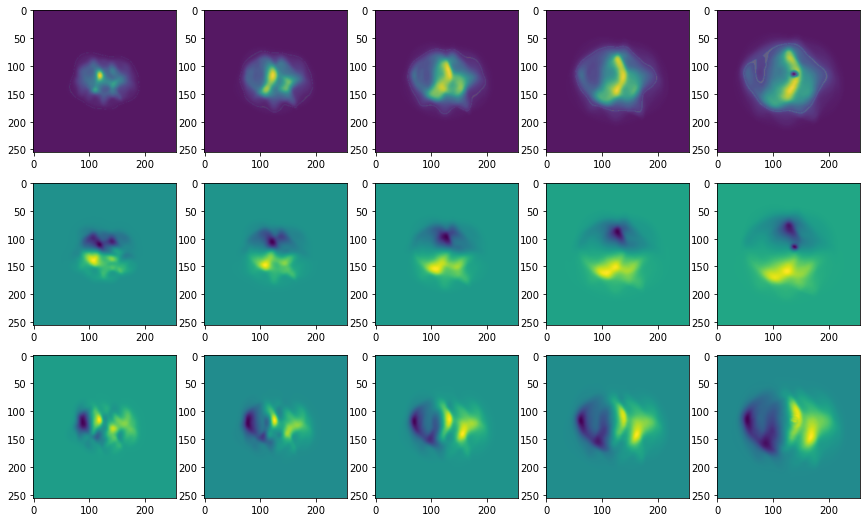

In [3]:
from torch.utils.data.sampler import Sampler

EPS = 0.01

class SubsetSampler(Sampler):
    def __init__(self, indices):
        self.indices = indices

    def __iter__(self):
        return (self.indices[i] for i in range(len(self.indices)))

    def __len__(self):
        return len(self.indices)

train_folder = 'D:/CernDataset'
dataset = datasets.CernDatasetOneStepVelocities(train_folder, start_moment=0, end_moment=1,
                                                predict_type=-1, modified_velocities=True,
                                               use_init_velocities=False)
indices = list(range(20))
sampler = SubsetSampler(indices)
loader = torch.utils.data.DataLoader(dataset,
                                     sampler=sampler)

device=torch.device("cpu")
t = iter(loader)
next(t)
#next(t)
#next(t)
x, y = next(t)
x = x.to(device)

fig = plt.figure(figsize=(24,9))
for i in range(8):
    model = torch.load(f'../models/du{i}{i+1}16ep.pth')
    model.to(device)
    model.eval()
    x = model(x)
    prediction = x.detach().cpu()
    
    fig.add_subplot(3, 8, i + 1)
    plt.imshow(torch.squeeze(prediction)[0], alpha=0.9)
    plt.imshow(np.abs(torch.squeeze(prediction)[0] - 0.18) < EPS,alpha=0.1)
    fig.add_subplot(3, 8, i + 9)
    plt.imshow(torch.squeeze(prediction)[1])
    fig.add_subplot(3, 8, i + 17)
    plt.imshow(torch.squeeze(prediction)[2])
    

In [3]:
model1 = torch.load('../models/du0116ep.pth')
model2 = torch.load('../models/du1216ep.pth')
model3 = torch.load('../models/du2316ep.pth')
model4 = torch.load('../models/du3416ep.pth')
model5 = torch.load('../models/du4516ep.pth')
model6 = torch.load('../models/du5616ep.pth')
model7 = torch.load('../models/du6716ep.pth')
model8 = torch.load('../models/du7816ep.pth')

In [6]:
train_folder = 'D:/CernDataset'
dataset = datasets.CernDatasetOneStepVelocities(train_folder, start_moment=0, end_moment=1,
                                                predict_type=-1, modified_velocities=True,
                                               use_init_velocities=False)
indices = list(range(20))
sampler = SubsetSampler(indices)
loader = torch.utils.data.DataLoader(dataset,
                                     sampler=sampler)

device=torch.device("cpu")
t = iter(loader)
next(t)
#next(t)
#next(t)
x, y = next(t)
x = x.to(device)

model1.to(device)
model1.eval()
prediction1=model1(x)
model2.to(device)
model2.eval()
prediction2=model2(prediction1)
model3.to(device)
model3.eval()
prediction3=model3(prediction2)
model4.to(device)
model4.eval()
prediction4=model4(prediction3)
model5.to(device)
model5.eval()
prediction5=model5(prediction4)
model6.to(device)
model6.eval()
prediction6=model6(prediction5)
model7.to(device)
model7.eval()
prediction7=model7(prediction6)
model8.to(device)
model8.eval()
prediction8=model8(prediction7)

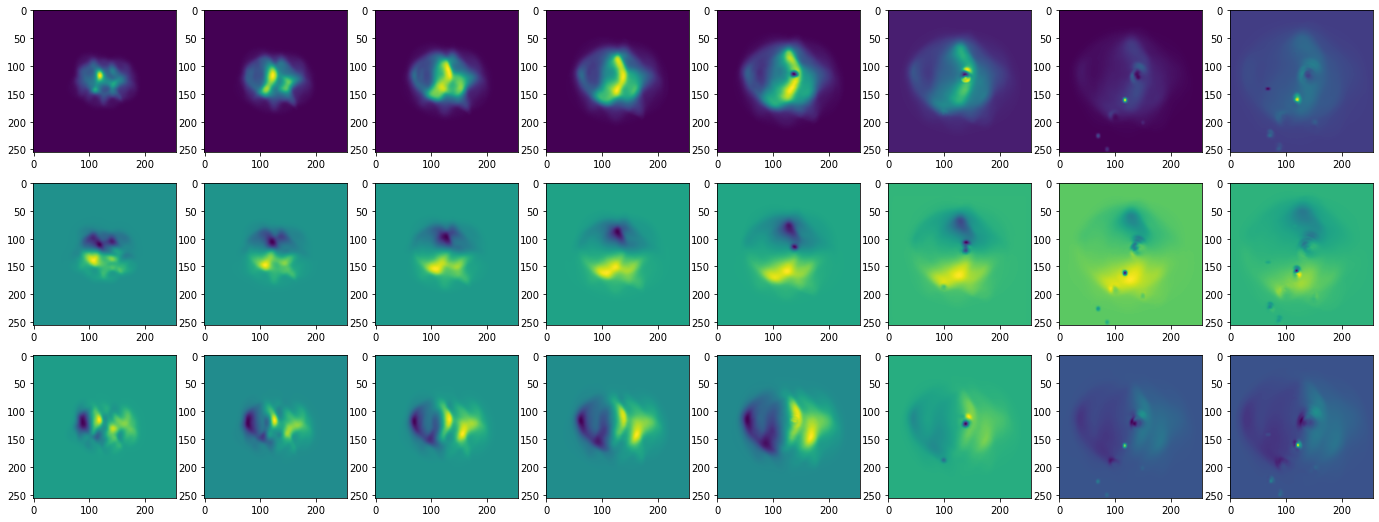

In [7]:
fig = plt.figure(figsize=(24,9))

prediction1 = prediction1.detach().cpu()
prediction2 = prediction2.detach().cpu()
prediction3 = prediction3.detach().cpu()
prediction4 = prediction4.detach().cpu()
prediction5 = prediction5.detach().cpu()
prediction6 = prediction6.detach().cpu()
prediction7 = prediction7.detach().cpu()
prediction8 = prediction8.detach().cpu()

fig.add_subplot(3, 8, 1)
plt.imshow(torch.squeeze(prediction1)[0])
fig.add_subplot(3, 8, 9)
plt.imshow(torch.squeeze(prediction1)[1])
fig.add_subplot(3, 8, 17)
plt.imshow(torch.squeeze(prediction1)[2])
fig.add_subplot(3, 8, 2)
plt.imshow(torch.squeeze(prediction2)[0])
fig.add_subplot(3, 8, 10)
plt.imshow(torch.squeeze(prediction2)[1])
fig.add_subplot(3, 8, 18)
plt.imshow(torch.squeeze(prediction2)[2])
fig.add_subplot(3, 8, 3)
plt.imshow(torch.squeeze(prediction3)[0])
fig.add_subplot(3, 8, 11)
plt.imshow(torch.squeeze(prediction3)[1])
fig.add_subplot(3, 8, 19)
plt.imshow(torch.squeeze(prediction3)[2])
fig.add_subplot(3, 8, 4)
plt.imshow(torch.squeeze(prediction4)[0])
fig.add_subplot(3, 8, 12)
plt.imshow(torch.squeeze(prediction4)[1])
fig.add_subplot(3, 8, 20)
plt.imshow(torch.squeeze(prediction4)[2])
fig.add_subplot(3, 8, 5)
plt.imshow(torch.squeeze(prediction5)[0])
fig.add_subplot(3, 8, 13)
plt.imshow(torch.squeeze(prediction5)[1])
fig.add_subplot(3, 8, 21)
plt.imshow(torch.squeeze(prediction5)[2])
fig.add_subplot(3, 8, 6)
plt.imshow(torch.squeeze(prediction6)[0])
fig.add_subplot(3, 8, 14)
plt.imshow(torch.squeeze(prediction6)[1])
fig.add_subplot(3, 8, 22)
plt.imshow(torch.squeeze(prediction6)[2])
fig.add_subplot(3, 8, 7)
plt.imshow(torch.squeeze(prediction7)[0])
fig.add_subplot(3, 8, 15)
plt.imshow(torch.squeeze(prediction7)[1])
fig.add_subplot(3, 8, 23)
plt.imshow(torch.squeeze(prediction7)[2])
fig.add_subplot(3, 8, 8)
plt.imshow(torch.squeeze(prediction8)[0])
fig.add_subplot(3, 8, 16)
plt.imshow(torch.squeeze(prediction8)[1])
fig.add_subplot(3, 8, 24)
plt.imshow(torch.squeeze(prediction8)[2])